In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First we upload data from the jsol-file.

In [2]:
# read file
with open('events.json', 'r') as myfile:
    data = myfile.read()

# parse file
obj = json.loads(data)

Then we transform data from the json format into a dataframe (actually a table) and look at the data we got.

In [3]:
df = pd.DataFrame(obj)
df

,t,id,type,cards
0,1580515208723,0,newVisitor,NaN
1,1580515217157,1,newVisitor,NaN
2,1580515221870,2,newVisitor,NaN
3,1580515253128,3,newVisitor,NaN
4,1580515276372,4,newVisitor,NaN
...,...,...,...,...
152607,1583107173791,84739,newVisitor,NaN
152608,1583107176810,84740,newVisitor,NaN
152609,1583107178044,84741,newVisitor,NaN
152610,1583107191582,84740,viewTestimonialsSection,"[92, 73, 24, 32, 55, 26, 68, 1, 1, 88]"


It is easy to notice that the most important column is "type". Let's look at the possible values of this column.

In [4]:
df["type"].unique()

array(['newVisitor', 'viewTestimonialsSection', 'clickOnAboutPage',
       'pageClosed', 'clickOnPurchaseButton', 'clickOnRegisterButton'],
      dtype=object)

Now let's find out how many users visited our site.

In [5]:
len(df["id"].unique())

84742

The whole quantity of records is following.

In [6]:
len(df)

152612

Let's see how many records there are with the type 'newVisitor'.

In [7]:
len(df[df["type"]=='newVisitor'])

84742

The last result shows that each site user corresponds to record with type 'newVisitor'. We can ignore these records.


Now let's look at the other values of column "type".

In [8]:
len(df[df["type"]=='viewTestimonialsSection'])

33935

In [9]:
len(df[df["type"]=='clickOnAboutPage'])

7367

In [10]:
len(df[df["type"]=='pageClosed'])

7540

In [11]:
len(df[df["type"]=='clickOnPurchaseButton'])

9481

In [12]:
len(df[df["type"]=='clickOnRegisterButton'])

9547

In [13]:
len(df[df["type"]=='viewTestimonialsSection']) == len(df[df["type"]=='clickOnAboutPage']) +\
len(df[df["type"]=='pageClosed']) + len(df[df["type"]=='clickOnPurchaseButton']) + len(df[df["type"]=='clickOnRegisterButton'])

True

We notice that there are as many records of 'viewTestimonialsSection' type as ones of the other types. It means that each visitor who viewed feedback section then did one of the following manipulations: 'click on about page',
       'page closed', 'click on purchase button', 'click on register button'.

Now let's move to a bit more comfortable representation of the data.

In [14]:
data = []
for i in range(len(df['id'].unique())):
    data.append({'id': i, 'newVisitor': 0, 'viewTestimonialsSection': 0, 'clickOnAboutPage': 0, 'pageClosed': 0,
                'clickOnPurchaseButton': 0, 'clickOnRegisterButton': 0, "cards": None})

for item in data:
    df_temp = df[df['id']==item['id']]
    for i in range(len(df_temp)):
        if df_temp['id'].iloc[i] == item['id']:
            item[df_temp['type'].iloc[i]] += 1
        if type(df_temp['cards'].iloc[i]) == list:
            item["cards"] = df_temp['cards'].iloc[i]

df_visitors = pd.DataFrame(data)
df_visitors 

,id,newVisitor,viewTestimonialsSection,clickOnAboutPage,pageClosed,clickOnPurchaseButton,clickOnRegisterButton,cards
0,0,1,0,0,0,0,0,None
1,1,1,0,0,0,0,0,None
2,2,1,0,0,0,0,0,None
3,3,1,0,0,0,0,0,None
4,4,1,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...
84737,84737,1,0,0,0,0,0,None
84738,84738,1,0,0,0,0,0,None
84739,84739,1,0,0,0,0,0,None
84740,84740,1,1,0,1,0,0,"[92, 73, 24, 32, 55, 26, 68, 1, 1, 88]"


Let's visualize the data.

In [15]:
df_visitors.sum()[1:]

newVisitor                 84742
viewTestimonialsSection    33935
clickOnAboutPage            7367
pageClosed                  7540
clickOnPurchaseButton       9481
clickOnRegisterButton       9547
dtype: int64

<BarContainer object of 6 artists>

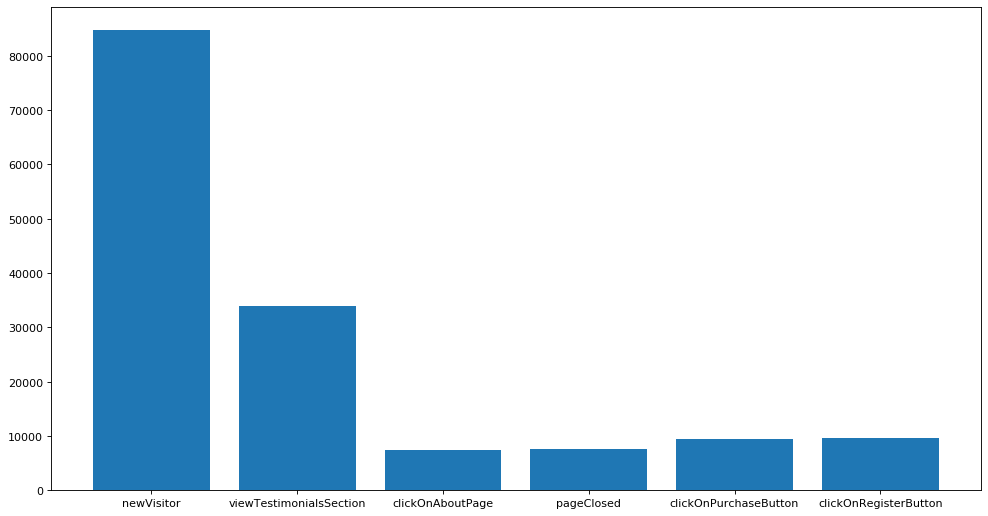

In [16]:
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(df_visitors.columns[1:-1], df_visitors.sum()[1:].to_list())

In [17]:
df_visitors[df_visitors['viewTestimonialsSection']==1].sum()[3:-1]

clickOnAboutPage         7367
pageClosed               7540
clickOnPurchaseButton    9481
clickOnRegisterButton    9547
dtype: object

So, after viewing the feedback section one of the following actions was done.

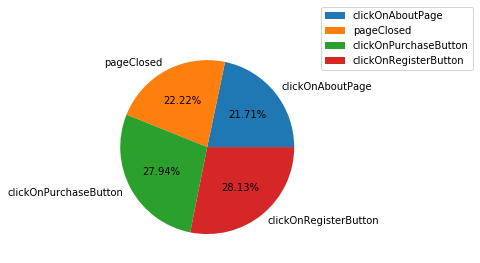

In [18]:
plt.pie(df_visitors.sum()[3:].to_list(), labels=df_visitors.columns[3:-1], autopct='%1.2f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))

Probably it is worth to explore view cards of those visitors who did some purchases.

(array([1000.,  815., 1028.,  998.,  955.,  961.,  922.,  838., 1010.,
         963., 1005.,  981.,    0.,  970., 1044.,  964.,  956., 1087.,
         857.,  943.,  993., 1027.,  911.,  993., 1011.,  981.,  899.,
         955.,  970.,  880., 1020.,  936., 1012., 1021.,  985.,  934.,
         996.,  870.,  958., 1018.,  989.,  975.,  959.,  965., 1015.,
         971.,  873.,  927.,  960.,  734.,  968.,  935.,  945.,  961.,
         905.,  947.,  951., 1025.,  926., 1033.,  972., 1005.,  980.,
        1031.,  730.,  946.,  950., 1030.,  935.,  966.,  972.,  934.,
        1014.,  895.,  799.,  976.,  947., 1007., 1073.,  477., 1035.,
         989.,  924., 1005., 1009.,  890., 1030.,  844.,  974., 1007.,
         931., 1007.,  896., 1027., 1009., 1025., 1027., 1007., 1904.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

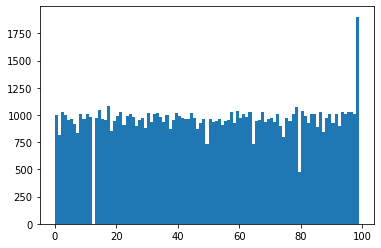

In [19]:
plt.hist(df_visitors[df_visitors['clickOnPurchaseButton']==1].sum()[-1],bins=99)

or did no purchase.

(array([2354., 2586., 2406., 2520., 2479., 2445., 2366., 2535., 2393.,
        2315., 2388., 2476., 3354., 2383., 2412., 2349., 2464., 2387.,
        2607., 2455., 2404., 2422., 2414., 2356., 2389., 2436., 2582.,
        2373., 2437., 2466., 2414., 2400., 2468., 2372., 2417., 2454.,
        2380., 2525., 2430., 2358., 2404., 2336., 2471., 2448., 2332.,
        2454., 2439., 2466., 2406., 2535., 2441., 2390., 2388., 2349.,
        2538., 2445., 2394., 2392., 2441., 2443., 2364., 2401., 2342.,
        2410., 2591., 2336., 2527., 2440., 2481., 2363., 2352., 2517.,
        2455., 2506., 2587., 2387., 2433., 2413., 2390., 2912., 2329.,
        2432., 2469., 2459., 2394., 2420., 2425., 2478., 2559., 2395.,
        2441., 2459., 2598., 2296., 2400., 2434., 2439., 2364., 4859.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

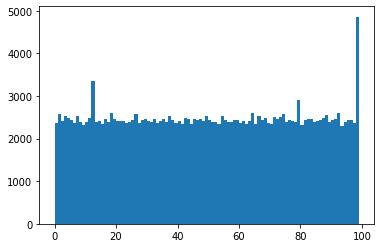

In [44]:
plt.hist(df_visitors[(df_visitors['viewTestimonialsSection']==1) & (df_visitors['clickOnPurchaseButton']!=1)].sum()[-1],bins=99)

(array([3354., 3401., 3434., 3518., 3434., 3406., 3288., 3373., 3403.,
        3278., 3393., 3457., 3354., 3353., 3456., 3313., 3420., 3474.,
        3464., 3398., 3397., 3449., 3325., 3349., 3400., 3417., 3481.,
        3328., 3407., 3346., 3434., 3336., 3480., 3393., 3402., 3388.,
        3376., 3395., 3388., 3376., 3393., 3311., 3430., 3413., 3347.,
        3425., 3312., 3393., 3366., 3269., 3409., 3325., 3333., 3310.,
        3443., 3392., 3345., 3417., 3367., 3476., 3336., 3406., 3322.,
        3441., 3321., 3282., 3477., 3470., 3416., 3329., 3324., 3451.,
        3469., 3401., 3386., 3363., 3380., 3420., 3463., 3389., 3364.,
        3421., 3393., 3464., 3403., 3310., 3455., 3322., 3533., 3402.,
        3372., 3466., 3494., 3323., 3409., 3459., 3466., 3371., 3366.,
        3397.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 10.89, 11.88, 12.87, 13.86, 14.85, 15.84, 16.83,
        17.82, 18.81, 19.8 , 20.79, 21.78, 22.77, 23.76, 24.

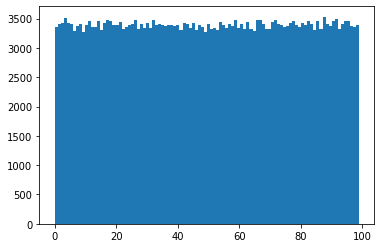

In [70]:
#fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(df_visitors[df_visitors['viewTestimonialsSection']==1].sum()[-1],bins=100)

In [48]:
len(df_visitors[df_visitors['viewTestimonialsSection']==1].sum()[-1])

339350

(array([ 666.,  879.,  682.,  722.,  760.,  724.,  692.,  828.,  738.,
         721.,  675.,  703., 1682.,  723.,  720.,  657.,  716.,  700.,
         870.,  771.,  667.,  655.,  747.,  646.,  722.,  679.,  798.,
         692.,  754.,  776.,  698.,  702.,  720.,  705.,  726.,  710.,
         654.,  793.,  737.,  646.,  695.,  666.,  715.,  688.,  731.,
         737.,  782.,  723.,  693.,  864.,  665.,  710.,  742.,  716.,
         778.,  792.,  719.,  695.,  719.,  704.,  676.,  682.,  673.,
         709.,  891.,  653.,  772.,  702.,  749.,  681.,  706.,  696.,
         692.,  742.,  826.,  692.,  779.,  667.,  667., 1221.,  653.,
         669.,  806.,  710.,  716.,  766.,  709.,  782.,  782.,  680.,
         729.,  703.,  832.,  638.,  681.,  689.,  680.,  704., 1475.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

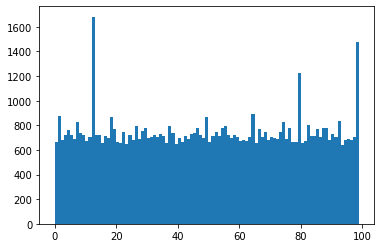

In [26]:
plt.hist(df_visitors[df_visitors['clickOnAboutPage']==1].sum()[-1],bins=99)

(array([ 983.,  821., 1009., 1056., 1024., 1024., 1002.,  796.,  991.,
         904.,  997., 1042.,    0.,  918.,  966.,  982.,  973., 1023.,
         844.,  936.,  989., 1073.,  942.,  971.,  982., 1015.,  958.,
         979.,  976.,  920.,  966., 1040., 1021., 1038.,  953.,  994.,
         992.,  911.,  983., 1011., 1013.,  982.,  995., 1000.,  902.,
        1002.,  909.,  974.,  987.,  725., 1000.,  968.,  952.,  949.,
         973.,  890.,  932.,  997.,  981., 1029.,  949.,  991.,  955.,
        1022.,  747.,  993.,  982., 1038.,  950., 1000.,  937., 1036.,
        1023.,  962.,  866.,  973.,  922., 1019., 1039.,  462.,  988.,
        1029.,  876., 1030.,  998.,  904.,  995.,  867.,  948., 1021.,
         977., 1012.,  863.,  978., 1038., 1002., 1029.,  980., 1904.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

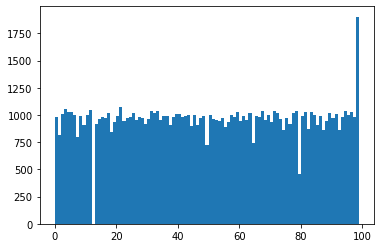

In [45]:
plt.hist(df_visitors[df_visitors['clickOnRegisterButton']==1].sum()[-1],bins=99)

(array([ 666.,  879.,  682.,  722.,  760.,  724.,  692.,  828.,  738.,
         721.,  675.,  703., 1682.,  723.,  720.,  657.,  716.,  700.,
         870.,  771.,  667.,  655.,  747.,  646.,  722.,  679.,  798.,
         692.,  754.,  776.,  698.,  702.,  720.,  705.,  726.,  710.,
         654.,  793.,  737.,  646.,  695.,  666.,  715.,  688.,  731.,
         737.,  782.,  723.,  693.,  864.,  665.,  710.,  742.,  716.,
         778.,  792.,  719.,  695.,  719.,  704.,  676.,  682.,  673.,
         709.,  891.,  653.,  772.,  702.,  749.,  681.,  706.,  696.,
         692.,  742.,  826.,  692.,  779.,  667.,  667., 1221.,  653.,
         669.,  806.,  710.,  716.,  766.,  709.,  782.,  782.,  680.,
         729.,  703.,  832.,  638.,  681.,  689.,  680.,  704., 1475.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.

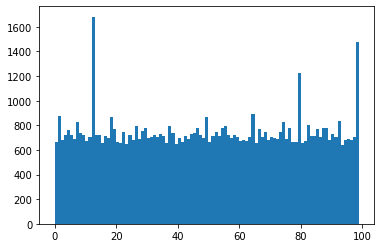

In [46]:
plt.hist(df_visitors[df_visitors['clickOnAboutPage']==1].sum()[-1],bins=99)

In [43]:
lst = []
for i in range(100):
    for item in df_visitors[df_visitors['viewTestimonialsSection']==1]['cards'].to_list():
        if item.count(i) == 4:
            lst.append(i)
            print("{} --> {}".format(i, item))
            
len(set(lst))

0 --> [0, 35, 41, 87, 76, 0, 39, 53, 0, 0]
29 --> [29, 44, 29, 29, 29, 77, 25, 59, 10, 23]
48 --> [68, 42, 23, 29, 48, 69, 48, 48, 48, 45]
56 --> [29, 65, 56, 72, 56, 56, 16, 41, 56, 93]
68 --> [97, 68, 55, 1, 68, 16, 63, 69, 68, 68]
95 --> [95, 95, 94, 63, 15, 17, 95, 18, 93, 95]


6

#### Conclusions:

JSON-file contains 152612 records of the visitors. There are 84742 visitors in general. At first, every visitor have done the first visit to the site. Only 33935 visitors did some more actions on the site. Each of these 33935 visitors viewed feedback section of the site. Then each of them did one of four operations: 'click on about page', 'page closed', 'click on purchase button', 'click on register button'. From the business point of view those visitors are the most important, who did a purchase. There are 9481 such visitors. What comes to feedback cards, here attention should be paid to the card with number 12, since everyone, who did purchases, didn't see this card, and everyone, who saw this card didn't do any purchase. Another fact worth mentioning is that users recieved a card with number 99 suspectfully often.

In [68]:
dct = {}
for i in range(100): 
    dct[i] = 0 
    for item in df_visitors[df_visitors['clickOnPurchaseButton']==1]['cards'].to_list():
        dct[i] += item.count(i)
print(dct)

{0: 1000, 1: 815, 2: 1028, 3: 998, 4: 955, 5: 961, 6: 922, 7: 838, 8: 1010, 9: 963, 10: 1005, 11: 981, 12: 0, 13: 970, 14: 1044, 15: 964, 16: 956, 17: 1087, 18: 857, 19: 943, 20: 993, 21: 1027, 22: 911, 23: 993, 24: 1011, 25: 981, 26: 899, 27: 955, 28: 970, 29: 880, 30: 1020, 31: 936, 32: 1012, 33: 1021, 34: 985, 35: 934, 36: 996, 37: 870, 38: 958, 39: 1018, 40: 989, 41: 975, 42: 959, 43: 965, 44: 1015, 45: 971, 46: 873, 47: 927, 48: 960, 49: 734, 50: 968, 51: 935, 52: 945, 53: 961, 54: 905, 55: 947, 56: 951, 57: 1025, 58: 926, 59: 1033, 60: 972, 61: 1005, 62: 980, 63: 1031, 64: 730, 65: 946, 66: 950, 67: 1030, 68: 935, 69: 966, 70: 972, 71: 934, 72: 1014, 73: 895, 74: 799, 75: 976, 76: 947, 77: 1007, 78: 1073, 79: 477, 80: 1035, 81: 989, 82: 924, 83: 1005, 84: 1009, 85: 890, 86: 1030, 87: 844, 88: 974, 89: 1007, 90: 931, 91: 1007, 92: 896, 93: 1027, 94: 1009, 95: 1025, 96: 1027, 97: 1007, 98: 951, 99: 953}
